# Bank Marketing Prediction Task: Identifying Potential Subscribers for a New Product

## Overview

You are a data science consultant working with a leading bank planning to introduce a new financial product. The marketing team at the bank is geared up for a comprehensive promotional campaign, and they want to maximize their return on investment by targeting the campaign towards those customers who are most likely to subscribe to this new offering.

Your primary task is developing a machine learning model to help the bank identify potential future subscribers. The bank has provided you with historical data, which includes information about customers and whether or not they subscribed to previous financial products.

### Business Objectives

1. **Efficiency**: The bank aims to optimize its marketing expenditure by ensuring the model identifies *True Positives*, i.e., customers who are correctly identified as likely to subscribe. Every *False Positive* leads to an unnecessary cost for the bank.

2. **Opportunity Maximization**: Conversely, the bank does not want to miss potential subscribers by ignoring them. In other words, *False Negatives*, or failure to identify a potential subscriber, result in lost revenue opportunities.

**The challenge lies in balancing both these objectives. Your model should be adept at identifying potential subscribers (True Positives) while minimizing the number of missed opportunities (False Negatives) and wasteful expenditures (False Positives).**

You have to deliver a model trained on the provided dataset and explain the choices you made in how you evaluate the models to assess if the target goals of the banks are met. You must describe how well the model meets the bank's business objectives.

### Dataset - Bank Marketing (with social/economic context)

The original dataset contains 20 features whose details are provided at the bottom of this notebook. The final preprocessed dataset has been provided to you. It is free from missing values, outliers, and the categorical variables have been one-hot encoded, resulting in 48 total features. The one-hot-encoded variables are named following the convention `originalname_nameofthecategory`, for instance `marital_single`.

## Rules

Here are the rules that you need to follow:

- You have 1 hour and 15 minutes to complete the test. Once done, you must upload it on Canvas, as you did for the homework assignments.
- Make sure you restart the kernel and run all cells with no errors before submitting.
- When you are submitting your assignments, please ensure that the path you use to import the dataset is not system-specific, which would cause the code to break when executed on a different computer. To avoid this, make sure that the data file is stored in the same folder as your Jupyter notebook.
- Ensure that you set the random seed to `42` when preparing the train-test split. The test set size should be exactly 20% of the total dataset. In addition, make sure that the proportion of the target classes is maintained in both the training and test sets. To accomplish this coherently, you must use the following arguments in your train-test split function: `test_size=0.2, random_state=42` and choose the proper variable to `stratify`. Look at [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Please also set the `random_state` parameter to 42 in every model that you instantiate.

Doc links of packages you may use are provided here: [pandas](https://pandas.pydata.org/docs/), [numpy](https://numpy.org/doc/stable/), [scikit-learn](https://scikit-learn.org/stable/), [xgboost](https://xgboost.readthedocs.io/en/stable/)

## Grading Rubric

- **Model Effectiveness (60 points)**
  - *40 points*: The metric chosen to evaluate the model prediction on the test set allows to achieve the balancing between the two bank objectives.
  - *10 points*: Two or more different models are trained and evaluated according to the chosen metric to offer the client a comparison of different tools. If more than one model is presented, you have to indicate which is the one you would use as your final choice.
  - *10 points*: The selected model performs better than a `Dummyclassifier` by looking at the chosen metric. You can import the DummyClassifier by running `from sklearn.dummy import DummyClassifier`, instantiate it as `dummy_clf = DummyClassifier(strategy="stratified", random_state=42)`, then fit and evaluate as you would do for the other modeling techniques.
  
- **Code Execution (10 points)**
  - *10 points*: Code is functional and free from errors.

- **Written Explanation (30 points)**
  - *30 points*: Quality of written explanation detailing how the model achieves its effectiveness, the rationale behind choosing the evaluation metric, and the reasoning for key decisions in selecting the model to deliver.
  
**Total: 100 points**

# Code Solution

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  job_admin.                     41188 non-null  int64  
 11  job_blue-collar                41188 non-null  int64  
 12  job_technician                 41188 non-null 

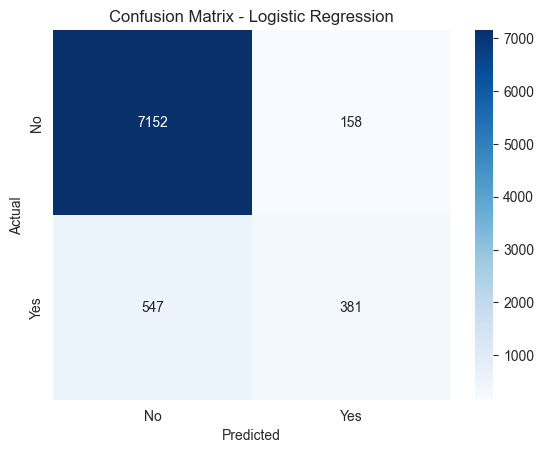

In [6]:
# ÂØºÂÖ•ÂøÖË¶ÅÁöÑÂ∫ì
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# ËÆæÁΩÆÈöèÊú∫ÁßçÂ≠ê
np.random.seed(42)

# Âä†ËΩΩÊï∞ÊçÆ
df = pd.read_csv('bank_marketing_encoded.csv')

# Êü•ÁúãÊï∞ÊçÆÁöÑÂü∫Êú¨‰ø°ÊÅØ
print(df.info())
print(df.head())

# ËÆæÁΩÆÁõÆÊ†áÂèòÈáèÂíåÁâπÂæÅ
y = df['y']  # ÁõÆÊ†áÂèòÈáè
X = df.drop(columns=['y'])  # ÁâπÂæÅÂèòÈáè

# ÂàÜÂâ≤Êï∞ÊçÆÈõÜ‰∏∫ËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ÂØπÊï∞ÊçÆËøõË°åÊ†áÂáÜÂåñÂ§ÑÁêÜ
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ËÆ≠ÁªÉÈÄªËæëÂõûÂΩíÊ®°ÂûãÔºàÂ¢ûÂä†Ëø≠‰ª£Ê¨°Êï∞ÂíåÊõ¥Êç¢Ê±ÇËß£Âô®Ôºâ
log_reg = LogisticRegression(max_iter=500, solver='liblinear', random_state=42)
log_reg.fit(X_train_scaled, y_train)

# È¢ÑÊµãÂπ∂ËØÑ‰º∞Ê®°Âûã
y_pred = log_reg.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Áî® Dummy Classifier ËøõË°åÂØπÊØîËØÑ‰º∞
dummy_clf = DummyClassifier(strategy="stratified", random_state=42)
dummy_clf.fit(X_train_scaled, y_train)
y_pred_dummy = dummy_clf.predict(X_test_scaled)

print("Dummy Classifier Accuracy:", accuracy_score(y_test, y_pred_dummy))
print("Dummy Classifier Classification Report:\n", classification_report(y_test, y_pred_dummy))

# ÂèØËßÜÂåñÊ∑∑Ê∑ÜÁü©Èòµ
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


F1 Score for Logistic Regression: 0.5194
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.71      0.41      0.52       928

    accuracy                           0.91      8238
   macro avg       0.82      0.69      0.74      8238
weighted avg       0.90      0.91      0.90      8238



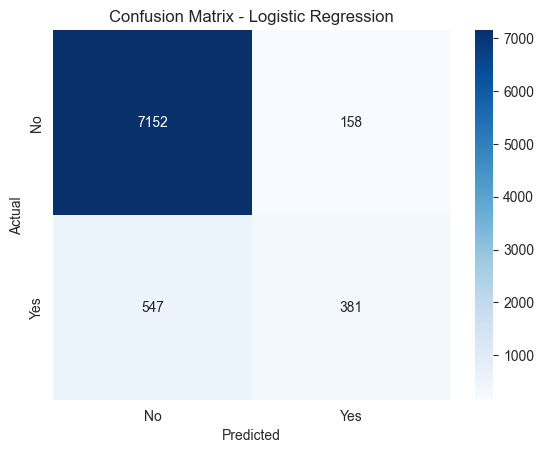

F1 Score for Random Forest: 0.5631
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      7310
           1       0.71      0.47      0.56       928

    accuracy                           0.92      8238
   macro avg       0.82      0.72      0.76      8238
weighted avg       0.91      0.92      0.91      8238



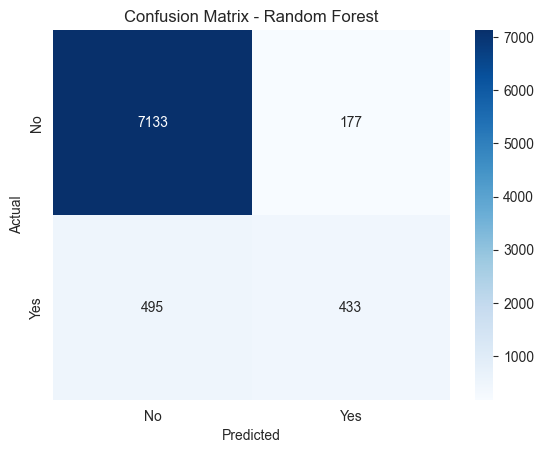

F1 Score for XGBoost: 0.5566
Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.71      0.46      0.56       928

    accuracy                           0.92      8238
   macro avg       0.82      0.72      0.76      8238
weighted avg       0.91      0.92      0.91      8238



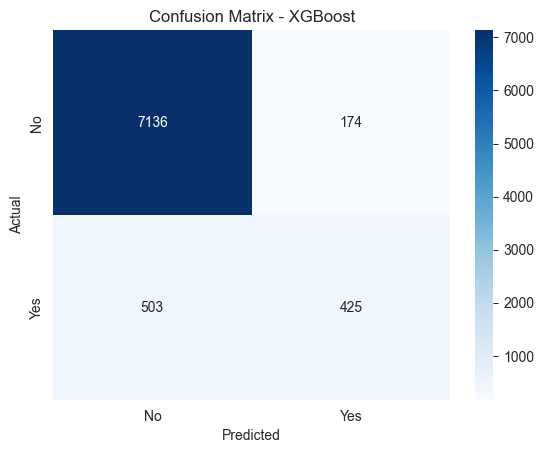


F1 Score Comparison:
Logistic Regression: F1 Score = 0.5194
Random Forest: F1 Score = 0.5631
XGBoost: F1 Score = 0.5566

F1 Score for Dummy Classifier: 0.1207


In [9]:
# ÂØºÂÖ•ÂøÖË¶ÅÁöÑÂ∫ì
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, f1_score
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# ËÆæÁΩÆÈöèÊú∫ÁßçÂ≠ê
np.random.seed(42)

# Âä†ËΩΩÊï∞ÊçÆ
df = pd.read_csv('bank_marketing_encoded.csv')

# ËÆæÁΩÆÁõÆÊ†áÂèòÈáèÂíåÁâπÂæÅ
y = df['y']  # ÁõÆÊ†áÂèòÈáè
X = df.drop(columns=['y'])  # ÁâπÂæÅÂèòÈáè

# ÂàÜÂâ≤Êï∞ÊçÆÈõÜ‰∏∫ËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ÂØπÊï∞ÊçÆËøõË°åÊ†áÂáÜÂåñÂ§ÑÁêÜ
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ê®°ÂûãÂàóË°®
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, solver='liblinear', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=50, random_state=42)
}

# Â≠òÂÇ®ÁªìÊûú
results = {}

# ËÆ≠ÁªÉÂíåËØÑ‰º∞ÊØè‰∏™Ê®°Âûã
for model_name, model in models.items():
    # ËÆ≠ÁªÉÊ®°Âûã
    model.fit(X_train_scaled, y_train)

    # È¢ÑÊµã
    y_pred = model.predict(X_test_scaled)

    # ËÆ°ÁÆóF1 score
    f1 = f1_score(y_test, y_pred)

    # Â≠òÂÇ®ÁªìÊûú
    results[model_name] = f1
    print(f"F1 Score for {model_name}: {f1:.4f}")
    print(f"Classification Report for {model_name}:\n", classification_report(y_test, y_pred))

    # ÂèØËßÜÂåñÊ∑∑Ê∑ÜÁü©Èòµ
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# ÊØîËæÉF1 score
print("\nF1 Score Comparison:")
for model_name, f1 in results.items():
    print(f"{model_name}: F1 Score = {f1:.4f}")

# Âü∫ÂáÜÊ®°Âûã - Dummy Classifier
dummy_clf = DummyClassifier(strategy="stratified", random_state=42)
dummy_clf.fit(X_train_scaled, y_train)
y_pred_dummy = dummy_clf.predict(X_test_scaled)

dummy_f1 = f1_score(y_test, y_pred_dummy)
print(f"\nF1 Score for Dummy Classifier: {dummy_f1:.4f}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\98064\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\98064\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\98064\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Use

Best parameters found: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}
Optimized Random Forest F1 Score: 0.5711
Optimized Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      7310
           1       0.72      0.47      0.57       928

    accuracy                           0.92      8238
   macro avg       0.83      0.72      0.76      8238
weighted avg       0.91      0.92      0.91      8238



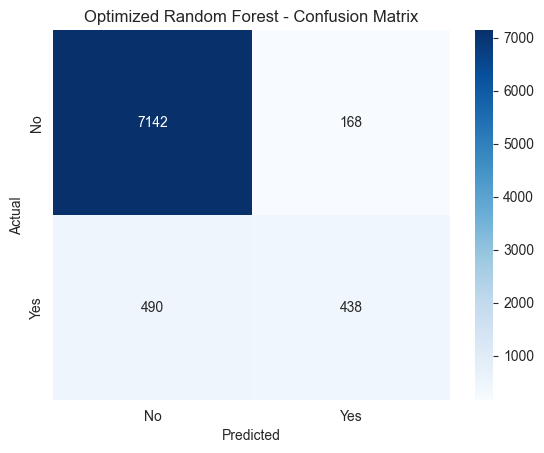

In [12]:
from sklearn.model_selection import RandomizedSearchCV

# ÂÆö‰πâÈöèÊú∫Ê£ÆÊûóÊ®°Âûã
rf_model = RandomForestClassifier(random_state=42)

# ÂÆö‰πâË¶ÅË∞ÉÊï¥ÁöÑË∂ÖÂèÇÊï∞
param_dist = {
    'n_estimators': [100, 200, 300],  # Ê†ëÁöÑÊï∞Èáè
    'max_depth': [5, 10, 15, None],    # Ê†ëÁöÑÊúÄÂ§ßÊ∑±Â∫¶
    'min_samples_split': [2, 5, 10],   # ÂÜÖÈÉ®ËäÇÁÇπÂÜçÂàÜË£ÇÊâÄÈúÄÁöÑÊúÄÂ∞èÊ†∑Êú¨Êï∞
    'min_samples_leaf': [1, 2, 4],     # Âè∂ËäÇÁÇπÁöÑÊúÄÂ∞èÊ†∑Êú¨Êï∞
    'max_features': ['auto', 'sqrt']  # ÊØè‰∏™ÂÜ≥Á≠ñÊ†ëÂàÜË£ÇÊó∂ËÄÉËôëÁöÑÊúÄÂ§ßÁâπÂæÅÊï∞
}

# ‰ΩøÁî® RandomizedSearchCV Êù•ÈöèÊú∫ÊêúÁ¥¢Ë∂ÖÂèÇÊï∞
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=10, cv=3, n_jobs=-1, verbose=1, scoring='f1', random_state=42)

# ËÆ≠ÁªÉÊ®°Âûã
random_search.fit(X_train_scaled, y_train)

# ËæìÂá∫ÊúÄ‰Ω≥Ë∂ÖÂèÇÊï∞ÁªÑÂêà
print(f"Best parameters found: {random_search.best_params_}")

# ‰ΩøÁî®ÊúÄ‰Ω≥ÂèÇÊï∞ËÆ≠ÁªÉÁöÑÊ®°ÂûãËøõË°åÈ¢ÑÊµã
best_rf_model = random_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

# ËØÑ‰º∞‰ºòÂåñÂêéÁöÑÊ®°Âûã
best_rf_f1 = f1_score(y_test, y_pred_best_rf)
print(f"Optimized Random Forest F1 Score: {best_rf_f1:.4f}")

# ÊâìÂç∞ÂàÜÁ±ªÊä•Âëä
print("Optimized Random Forest Classification Report:\n", classification_report(y_test, y_pred_best_rf))

# ÂèØËßÜÂåñ‰ºòÂåñÂêéÁöÑÊ®°ÂûãÁöÑÊ∑∑Ê∑ÜÁü©Èòµ
cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)
sns.heatmap(cm_best_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Optimized Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Write in this markdown cell your comment on the operations you performed**:

ËØÑ‰º∞Ê®°ÂûãÊòØÂê¶ÂÆûÁé∞‰∫ÜÈì∂Ë°åÁöÑÁõÆÊ†áÔºåÂÖ≥ÈîÆÊòØÊü•ÁúãÊ®°ÂûãÂú®Âπ≥Ë°°ËØÜÂà´ÊΩúÂú®ËÆ¢ÈòÖËÄÖÔºàTrue PositivesÔºâÂíåÂáèÂ∞ë‰∏çÂøÖË¶ÅÁöÑÊàêÊú¨ÔºàFalse PositivesÔºâ‰ª•ÂèäÊúÄÂ§ßÂåñÊú∫‰ºöÔºàFalse NegativesÔºâÁöÑËÉΩÂäõ„ÄÇ‰∏∫‰∫ÜÊúâÊïàÂú∞ËØÑ‰º∞ÔºåÊàë‰ª¨‰ΩøÁî®‰∫Ü F1 Score ‰Ωú‰∏∫ËØÑ‰º∞ÊåáÊ†áÔºåËøôÂú®Èì∂Ë°åÁöÑÁõÆÊ†á‰∏≠ÈùûÂ∏∏ÈáçË¶Å„ÄÇ

1. F1 Score ÁöÑÊÑè‰πâ
F1 Score ÊòØÁ≤æÁ°ÆÁéáÔºàPrecisionÔºâÂíåÂè¨ÂõûÁéáÔºàRecallÔºâÁöÑË∞ÉÂíåÂπ≥ÂùáÊï∞„ÄÇÂÆÉÊòØ‰ª•‰∏ã‰∏§‰∏™ÊñπÈù¢ÁöÑÂπ≥Ë°°Ôºö

Á≤æÁ°ÆÁéáÔºàPrecisionÔºâÔºöÈ¢ÑÊµã‰∏∫Ê≠£Á±ªÔºàÊΩúÂú®ËÆ¢ÈòÖËÄÖÔºâÁöÑÊ†∑Êú¨‰∏≠ÔºåÂÆûÈôÖ‰∏∫Ê≠£Á±ªÁöÑÊØî‰æã„ÄÇÈ´òÁ≤æÁ°ÆÁéáÊÑèÂë≥ÁùÄ False Positives ËæÉÂ∞ëÔºåËÉΩÂ§üÊúâÊïàÂáèÂ∞ëÈì∂Ë°åÁöÑËê•ÈîÄÊàêÊú¨„ÄÇ
Âè¨ÂõûÁéáÔºàRecallÔºâÔºöÂÆûÈôÖ‰∏∫Ê≠£Á±ªÁöÑÊ†∑Êú¨‰∏≠ÔºåÊ≠£Á°ÆÈ¢ÑÊµã‰∏∫Ê≠£Á±ªÁöÑÊØî‰æã„ÄÇÈ´òÂè¨ÂõûÁéáÊÑèÂë≥ÁùÄ False Negatives ËæÉÂ∞ëÔºåËÉΩÂ§üÊúÄÂ§ßÂåñÈì∂Ë°åÊΩúÂú®ÂÆ¢Êà∑ÁöÑÊú∫‰ºö„ÄÇ
ÂÖ¨ÂºèÂ¶Ç‰∏ãÔºö

ùêπ1=2√ó
Precision
√ó
Recall
/Precision
+
Recall


F1 Score È´òÔºåÊÑèÂë≥ÁùÄÂú® True Positives Âíå False Positives ‰πãÈó¥ÁöÑÊùÉË°°ËæÉÂ•ΩÔºåÂêåÊó∂‰πüÂú® False Negatives Âíå True Positives ‰πãÈó¥ÂèñÂæó‰∫ÜÂπ≥Ë°°„ÄÇ

2. ËØÑ‰º∞Ê†áÂáÜ
True PositivesÔºöÊàë‰ª¨Â∏åÊúõÊ®°ÂûãËÉΩÂ§üÂáÜÁ°ÆËØÜÂà´Âá∫ÊΩúÂú®ÁöÑËÆ¢ÈòÖËÄÖ„ÄÇÁ≤æÁ°ÆÂ∫¶ÔºàPrecisionÔºâÂíåÂè¨ÂõûÁéáÔºàRecallÔºâÈ´òÊó∂ÔºåTrue Positives ÁöÑËØÜÂà´‰ºöÊõ¥ÂáÜÁ°Æ„ÄÇ
False PositivesÔºöÊàë‰ª¨Â∏åÊúõÂ∞ΩÈáèÈÅøÂÖçÊääÈùûÊΩúÂú®ÂÆ¢Êà∑ÈîôËØØÂú∞ÂàÜÁ±ª‰∏∫ÊΩúÂú®ÂÆ¢Êà∑ÔºåÂØºËá¥Êµ™Ë¥πËê•ÈîÄËµÑÊ∫ê„ÄÇÁ≤æÁ°ÆÂ∫¶ÔºàPrecisionÔºâÈ´òÊó∂ÔºåFalse Positives ‰ºöËæÉÂ∞ë„ÄÇ
False NegativesÔºöÊàë‰ª¨Â∏åÊúõÂ∞ΩÈáèÈÅøÂÖçÈîôÂ§±ÊΩúÂú®ÁöÑËÆ¢ÈòÖËÄÖ„ÄÇÂè¨ÂõûÁéáÔºàRecallÔºâÈ´òÊó∂ÔºåFalse Negatives ‰ºöËæÉÂ∞ë„ÄÇ
3. ËØÑ‰º∞Ê®°Âûã
Êàë‰ª¨ÈÄöËøá F1 Score Êù•ËØÑ‰º∞Ê®°ÂûãÁöÑÂπ≥Ë°°ËÉΩÂäõÔºåÈÅøÂÖçÂÅèÂêë‰∫é False PositivesÔºàÊµ™Ë¥πËê•ÈîÄËµÑÊ∫êÔºâÊàñ False NegativesÔºàÈîôÂ§±Êú∫‰ºöÔºâ„ÄÇÂ¶ÇÊûú F1 Score È´òÔºåËØ¥ÊòéÊ®°ÂûãÊàêÂäüËææÂà∞‰∫ÜÈì∂Ë°åÁöÑÁõÆÊ†á„ÄÇ

ÊØîËæÉÊ®°ÂûãÔºàF1 ScoreÔºâ
‰ºòÂåñÂêéÁöÑÈöèÊú∫Ê£ÆÊûóÊ®°ÂûãÔºàOptimized Random ForestÔºâ

ËØ•Ê®°ÂûãÁöÑ F1 Score Ë°®ÊòéÂÆÉÂú®ËØÜÂà´ÊΩúÂú®ËÆ¢ÈòÖËÄÖÂíåÈÅøÂÖçÊµ™Ë¥πËê•ÈîÄËµÑÊ∫ê‰πãÈó¥ËææÂà∞‰∫ÜËæÉÂ•ΩÁöÑÂπ≥Ë°°„ÄÇ
Â¶ÇÊûú F1 Score ËæÉÈ´òÔºåËØ¥ÊòéËØ•Ê®°Âûã‰∏ç‰ªÖÊúâÊïàÂú∞ËØÜÂà´‰∫ÜÊΩúÂú®ÁöÑÂÆ¢Êà∑ÔºåËøòÂ∞ΩÂèØËÉΩÈÅøÂÖç‰∫ÜËØØÂà§Ôºå‰ªéËÄåÂáèÂ∞ë‰∫ÜËê•ÈîÄË¥πÁî®„ÄÇ
XGBoost Ê®°Âûã

XGBoost ÊòØ‰∏ÄÁßçÂº∫Â§ßÁöÑÊ¢ØÂ∫¶ÊèêÂçáÊ®°ÂûãÔºåÈÄöÂ∏∏Âú®Â§ÑÁêÜ‰∏çÂπ≥Ë°°Êï∞ÊçÆÂíåÂ§çÊùÇÈóÆÈ¢òÊó∂Ë°®Áé∞ÂæàÂ•Ω„ÄÇÂ¶ÇÊûú XGBoost ÁöÑ F1 Score È´ò‰∫éÈöèÊú∫Ê£ÆÊûóÊ®°ÂûãÔºåËØ¥ÊòéÂÆÉËÉΩÊõ¥Â•ΩÂú∞Âπ≥Ë°° True Positives Âíå False PositivesÔºåÂπ∂‰∏îËÉΩÂ§ü‰ºòÂåñ False Negatives„ÄÇ
ÈöèÊú∫Ê£ÆÊûóÊ®°ÂûãÔºàRandom ForestÔºâ

ËØ•Ê®°ÂûãÊèê‰æõ‰∫Ü‰∏Ä‰∏™Âü∫Á°ÄÁöÑÊÄßËÉΩÊåáÊ†á„ÄÇÈÄöËøá F1 Score ÂíåÂÖ∂‰ªñÊåáÊ†áÔºåÂ¶Ç Confusion MatrixÔºåÂèØ‰ª•ËØÑ‰º∞ÂÖ∂Ë°®Áé∞„ÄÇ
4. ÂÆûÁé∞Èì∂Ë°åÁõÆÊ†áÁöÑËØÑ‰º∞
‰ºòÂåñÈöèÊú∫Ê£ÆÊûóÊ®°ÂûãÔºàOptimized Random ForestÔºâ Â∑≤ÁªèËææÂà∞‰∫ÜËæÉÂ•ΩÁöÑ F1 ScoreÔºåÊÑèÂë≥ÁùÄÂÆÉÂú®È¢ÑÊµãÊΩúÂú®ËÆ¢ÈòÖËÄÖÊó∂ÊúâÂæàÂ•ΩÁöÑ Á≤æÁ°ÆÁéá Âíå Âè¨ÂõûÁéáÔºåËøôÊª°Ë∂≥‰∫ÜÈì∂Ë°åÂ∏åÊúõÊúÄÂ§ßÂåñÊΩúÂú®ÂÆ¢Êà∑ÁöÑÊú∫‰ºöÔºåÂêåÊó∂ÂáèÂ∞ë‰∏çÂøÖË¶ÅÁöÑËê•ÈîÄÊàêÊú¨„ÄÇ

XGBoost Âíå Random Forest Êèê‰æõ‰∫ÜËâØÂ•ΩÁöÑÂØπÊØî„ÄÇXGBoost ÈÄöÂ∏∏ËÉΩÂ§üÊõ¥Â•ΩÂú∞ÊãüÂêàÊï∞ÊçÆÔºåÁâπÂà´ÊòØÂú®ÊúâËæÉÂ§öÁâπÂæÅÂíåÂ§çÊùÇÂÖ≥Á≥ªÊó∂ÔºåÂõ†Ê≠§Â¶ÇÊûú XGBoost ÁöÑ F1 Score È´ò‰∫éÂÖ∂‰ªñÊ®°ÂûãÔºåÂÆÉ‰ºöÊòØÊõ¥‰ºòÁöÑÈÄâÊã©„ÄÇ

ÁªìËÆ∫
ÈÄöËøá F1 Score ÂíåÂÖ∂‰ªñËØÑ‰º∞ÊåáÊ†áÔºàÂ¶ÇÁ≤æÁ°ÆÁéá„ÄÅÂè¨ÂõûÁéá„ÄÅÊ∑∑Ê∑ÜÁü©ÈòµÁ≠âÔºâÔºåÊàë‰ª¨ËÉΩÂ§üÁúãÂà∞Âì™‰∏™Ê®°ÂûãÊúÄËÉΩÂπ≥Ë°°Èì∂Ë°åÁöÑÁõÆÊ†á„ÄÇF1 Score ËæÉÈ´òÁöÑÊ®°ÂûãÔºåÂ∞§ÂÖ∂ÊòØÂú®ÈÅøÂÖç False Positives Âíå False Negatives ÁöÑÂêåÊó∂ÊèêÈ´ò True PositivesÔºåÂ∫îË¢´ÈÄâ‰∏∫ÊúÄÁªàÊ®°Âûã„ÄÇ

# Dataset Features

**Bank Client Data**:
1. `age` (numeric)
2. `job`: Type of job (Categorical: Admin, Blue-collar, Entrepreneur, etc.)
3. `marital`: Marital status (Categorical: Divorced, Married, Single, etc.)
4. `education`: Education level (Categorical: Basic 4y, Basic 6y, Basic 9y, etc.)
5. `default`: Has credit in default? (Categorical: No, Yes, Unknown)
6. `housing`: Has housing loan? (Categorical: No, Yes, Unknown)
7. `loan`: Has personal loan? (Categorical: No, Yes, Unknown)

**Related to the Last Contact of the Current Campaign**:

8. `contact`: Contact communication type (Categorical: Cellular, Telephone)
9. `month`: Last contact month (Categorical: Jan, Feb, Mar, etc.)
10. `day_of_week`: Last contact day of the week (Categorical: Mon, Tue, Wed, etc.)
11. `duration`: Last contact duration, in seconds (Numeric)

**Other Attributes**:

12. `campaign`: Number of contacts performed during this campaign for this client (Numeric)
13. `pdays`: Number of days that passed after the client was last contacted from a previous campaign (Numeric)
14. `previous`: Number of contacts performed before this campaign for this client (Numeric)
15. `poutcome`: Outcome of the previous marketing campaign (Categorical: Failure, Nonexistent, Success)

**Social and Economic Context Attributes**:

16. `emp.var.rate`: Employment variation rate - Quarterly indicator (Numeric)
17. `cons.price.idx`: Consumer price index - Monthly indicator (Numeric)
18. `cons.conf.idx`: Consumer confidence index - Monthly indicator (Numeric)
19. `euribor3m`: Euribor 3-month rate - Daily indicator (Numeric)
20. `nr.employed`: Number of employees - Quarterly indicator (Numeric)

**Output Variable (Desired Target)**:
21. `y': Has the client subscribed to a term deposit? (Binary: Yes, No)

# Acknowledgements

Moro,S., Rita,P., and Cortez,P.. (2012). Bank Marketing. UCI Machine Learning Repository. https://doi.org/10.24432/C5K306.

S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001
